<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/atv3/trabalho_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

In [122]:
redes = []
n = 1000

for p in range(1, 10, 1):
  G = nx.erdos_renyi_graph(n, p/10, seed = 42)
  redes.append(G)
  print(p/10)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [123]:
def analisar_rede(rede):
  degree = np.array([a[1] for a in nx.degree(rede)])
  degree_avg = degree.mean()
  avg_clustering = nx.average_clustering(rede)
  density = nx.density(rede)
  avg_distance = nx.average_shortest_path_length(rede)

  return {"degree_avg": degree_avg,
          "avg_clustering": avg_clustering,
          "density": density,
          "avg_distance": avg_distance}

In [124]:
metricas = pd.DataFrame()

In [125]:
for i, rede in enumerate(redes):
  metricas[(i+1)/10] = analisar_rede(rede)

In [126]:
metricas = metricas.T

In [127]:
metricas

,degree_avg,avg_clustering,density,avg_distance
0.1,99.858,0.100209,0.099958,1.900082
0.2,199.702,0.199768,0.199902,1.800098
0.3,299.118,0.299320,0.299417,1.700583
0.4,398.872,0.399122,0.399271,1.600729
0.5,498.762,0.499175,0.499261,1.500739
0.6,598.178,0.598698,0.598777,1.401223
0.7,699.182,0.699873,0.699882,1.300118
0.8,798.900,0.799725,0.799700,1.200300
0.9,898.428,0.899339,0.899327,1.100673


In [129]:
metricas.columns = ['Grau Médio', 'Clustering Medio', 'Densidade', 'Distancia Media']

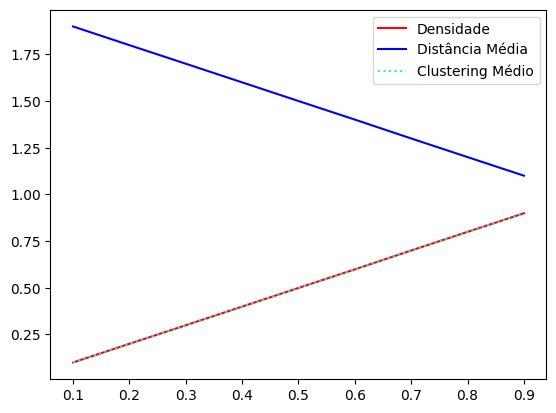

In [130]:
metricas[['Densidade', 'Distancia Media']].plot(color = ['red', 'blue'])
plt.plot(metricas['Clustering Medio'], color='#34ebde', linestyle='dotted')
plt.legend(["Densidade", "Distância Média", "Clustering Médio"])
plt.show()

In [103]:
correlacao = metricas.corr()

In [106]:
import seaborn as sn

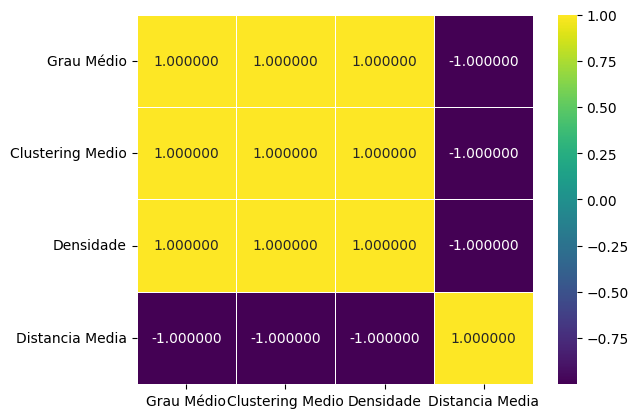

In [113]:
plot = sn.heatmap(correlacao, annot = True, fmt=".6f", linewidths=.5, cmap = 'viridis')

In [134]:
pos = nx.spring_layout(redes[0], seed=675)

In [154]:
centralidade = []
for rede in redes:
  centralidade.append(nx.degree_centrality(rede))

In [155]:
centralidade_redes = pd.DataFrame(data=centralidade)
centralidade_redes = centralidade_redes.T

In [183]:
def draw_net(ax, G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, ax=ax, cmap='viridis',
                                   node_color=list(measures),
                                   edgecolors='black',
                                   nodelist=measures.keys(),
                                   node_size=list(measures))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    edges = nx.draw_networkx_edges(G, pos, ax=ax)

    ax.set_title(measure_name)
    plt.colorbar(nodes, ax=ax, location='bottom', fraction=0.03, pad=0.03)
    ax.axis('off')

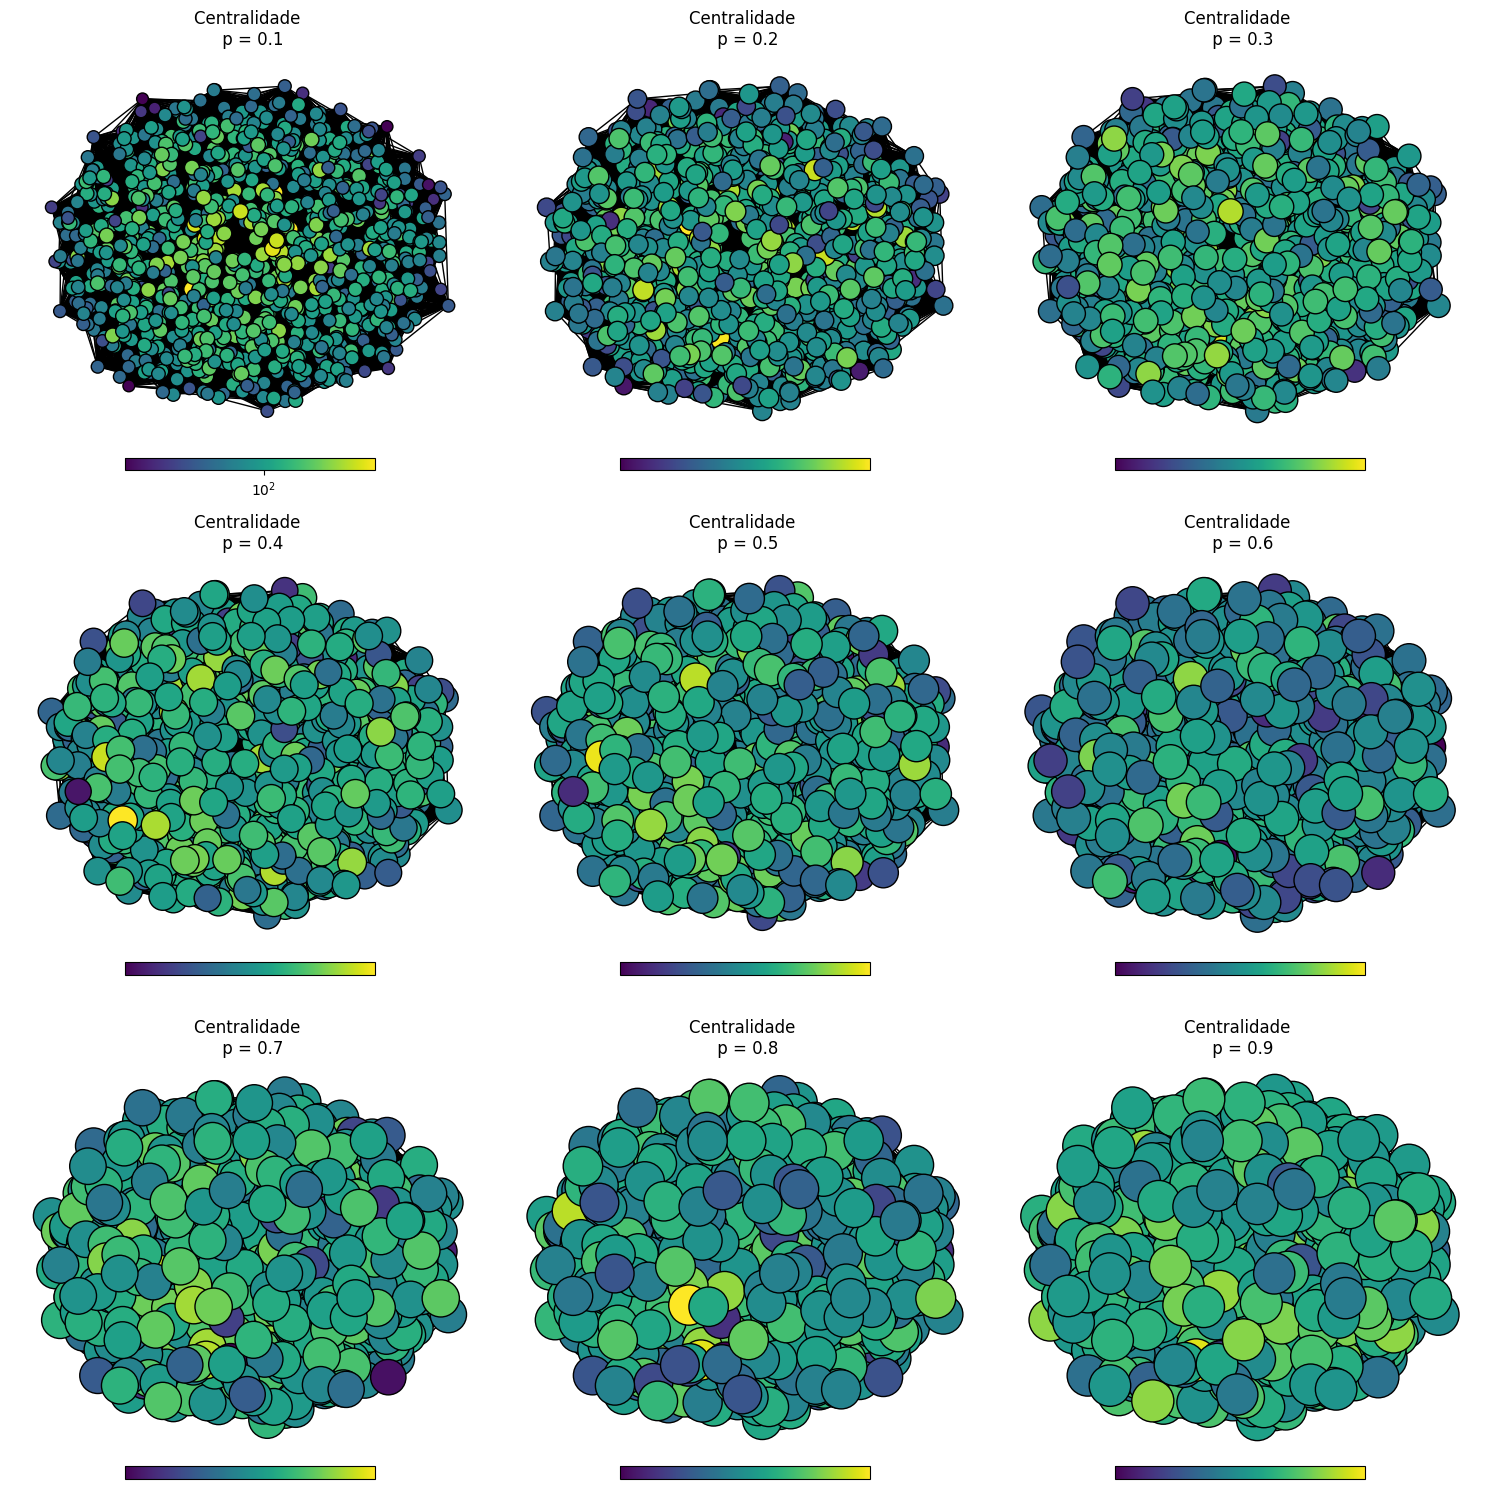

In [186]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axs = ax.flatten()

for i, rede in enumerate(redes):
    draw_net(axs[i], rede, pos, centralidade_redes[i]*1000, f"Centralidade \n p = {(i+1)/10}")

plt.tight_layout()
plt.show()

In [191]:
def print_logLog(axi, rede):
  # Calculate the frequency counts
  degree_counts = nx.degree_histogram(rede)

  # Normalize the frequency counts to get probabilities
  total_nodes = rede.order()
  degree_probs = [count / total_nodes for count in degree_counts]

  # Plot the degree distribution on a log-log scale
  axi.loglog(range(len(degree_probs)), degree_probs, '-', color='#a65c2b')
  axi.set_title('Degree Distribution (Log-Log)')
  axi.set_xlabel('Degree (log)')
  axi.set_ylabel('Probability (log)')

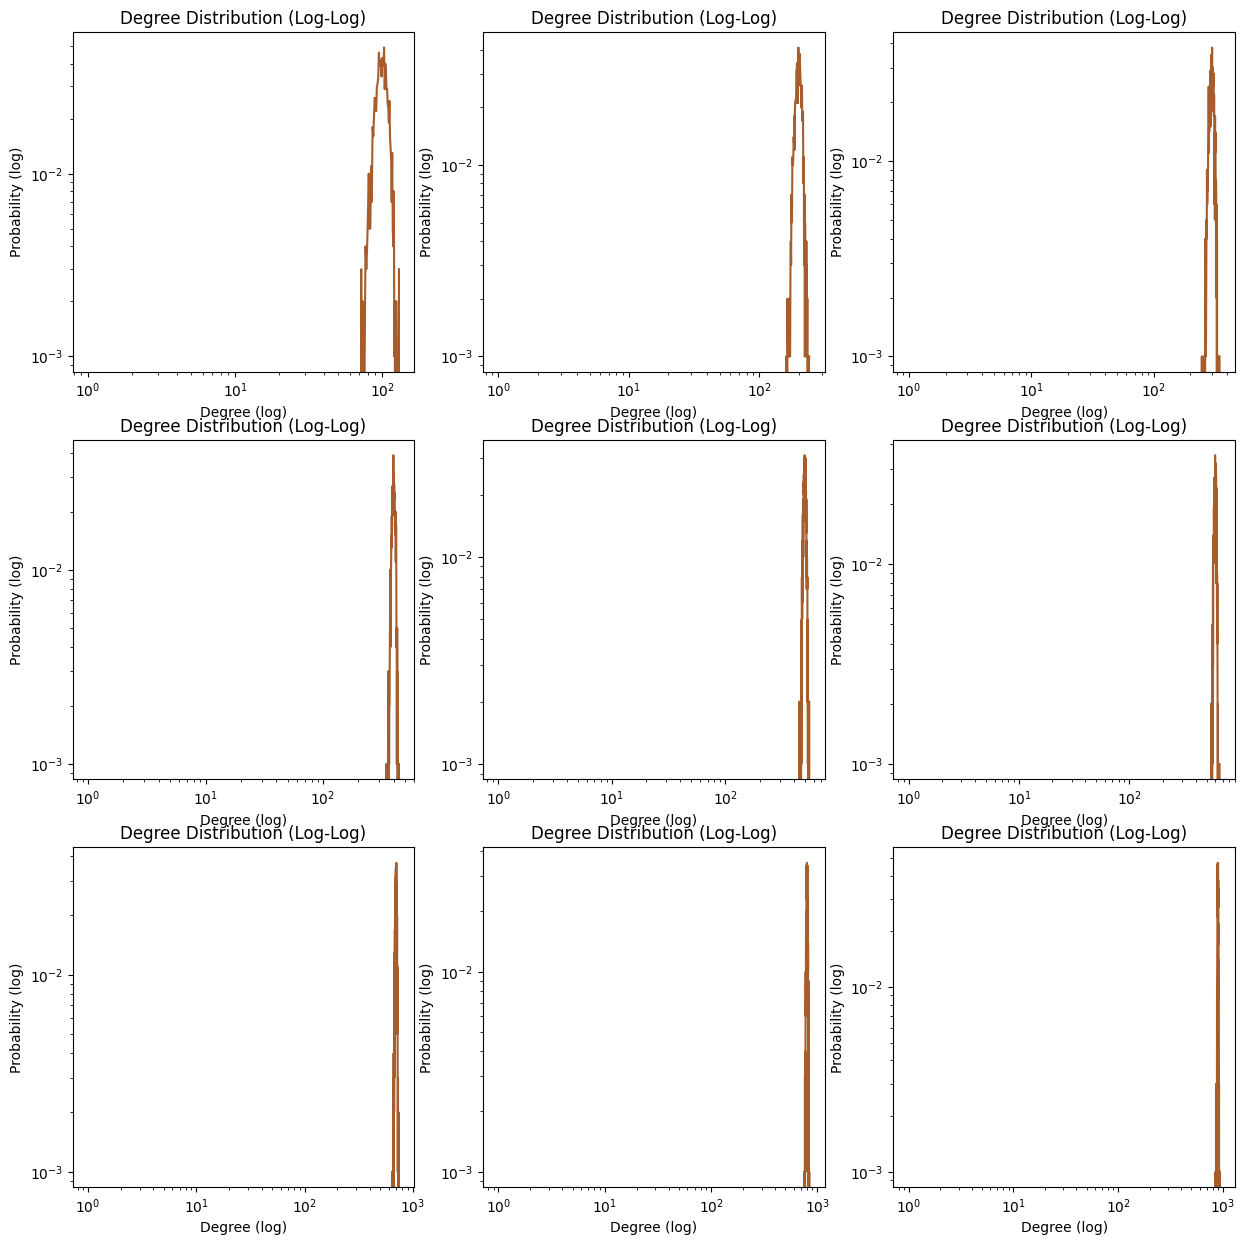

In [192]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axs = ax.flatten()

for i, rede in enumerate(redes):
  print_logLog(axs[i], rede)

plt.show()
